## CS 437 Project Deliverable 2 - Dataset Selection and Annotations

Umer Raja - 26100063

Muhammad Ahmad Ashraf - 26100169

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import random
import glob
import cv2

## Initial Analysis

In [ ]:
df = pd.read_csv('oasis_1.csv').drop(columns=['Delay'])

# Display 10 rows.
df.head(10)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,0.0,1588,0.803,1.105
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,0.0,1737,0.848,1.010
5,OAS1_0006_MR1,F,R,24,NaN,NaN,NaN,0.0,1131,0.862,1.551
6,OAS1_0007_MR1,M,R,21,NaN,NaN,NaN,0.0,1516,0.830,1.157
7,OAS1_0009_MR1,F,R,20,NaN,NaN,NaN,0.0,1505,0.843,1.166
8,OAS1_0010_MR1,M,R,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,F,R,52,3.0,2.0,30.0,0.0,1321,0.827,1.329


## Column Explanation for Original Data

The dataset includes various attributes that describe characteristics of the subjects in the study. Below is a brief explanation of each column:

- **ID**:  
  This column represents a unique identifier for each participant in the study. The ID is typically a numerical or alphanumeric code used to distinguish each subject.

- **M/F**:  
  This column indicates the gender of the participant, where "M" stands for Male and "F" stands for Female. It provides demographic information related to the study population.

- **Hand**:  
  This column specifies the handedness of the participant. It is commonly labeled as "Left" or "Right," indicating whether the participant is left-handed or right-handed. This is useful for studies that may be influenced by hand dominance.

- **Age**:  
  This column contains the age of the participant at the time the data was collected. Age is an important demographic factor that can influence various study outcomes.

- **Educ**:  
  This column refers to the highest level of education attained by the participant. It is usually represented as a categorical variable (e.g., "High School," "Bachelor's," "Master's," etc.). This helps assess the impact of educational background on the participant's cognitive function.

- **SES**:  
  This stands for Socioeconomic Status, which is typically a numerical or categorical representation of the participant's social and economic position. It may take into account factors like income, education, and occupation.

- **MMSE**:  
  The Mini-Mental State Examination (MMSE) score is a commonly used test to assess cognitive function. It is often used in studies related to dementia or other cognitive disorders. Higher scores generally


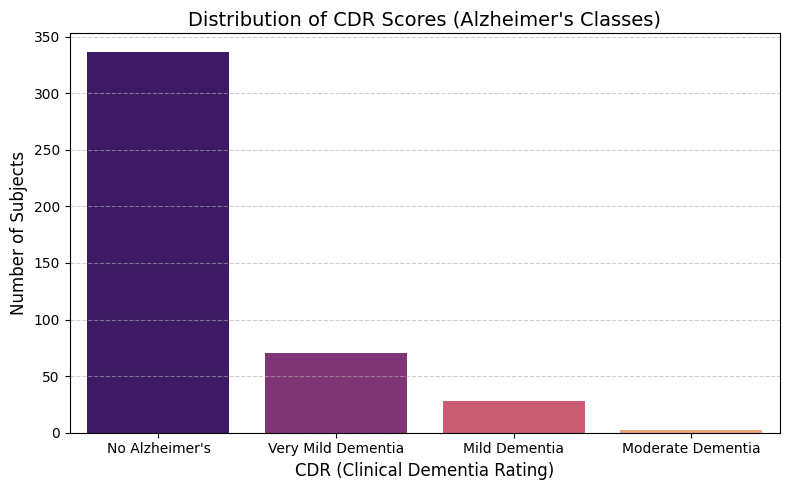

In [69]:
# Visualization of Target Label (CDR = Clinical Dementia Rating)
cdr_labels = {
    0.0: 'No Alzheimer\'s',
    0.5: 'Very Mild Dementia',
    1.0: 'Mild Dementia',
    2.0: 'Moderate Dementia',
    3.0: 'Severe Dementia'
}

df['CDR_Labels'] = df['CDR'].map(cdr_labels)


plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CDR_Labels',hue='CDR_Labels',palette='magma', legend=False)
plt.title('Distribution of CDR Scores (Alzheimer\'s Classes)', fontsize=14)
plt.xlabel('CDR (Clinical Dementia Rating)', fontsize=12)
plt.ylabel('Number of Subjects', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
# Displaying number of each class label.
class_counts = df['CDR_Labels'].value_counts().sort_index()
print("Alzheimer's Class Counts:\n")
for label, count in class_counts.items():
    print(f"{label}: {count}")

Alzheimer's Class Counts:

Mild Dementia: 28
Moderate Dementia: 2
No Alzheimer's: 336
Very Mild Dementia: 70


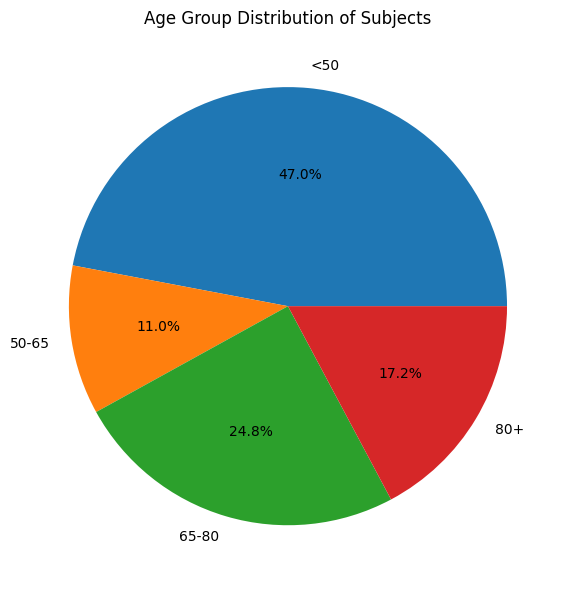

In [ ]:
bins = [0, 50, 65, 80, 100]
labels = ['<50', '50-65', '65-80', '80+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_counts = df['Age_Group'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Group Distribution of Subjects')
plt.tight_layout()
plt.show()

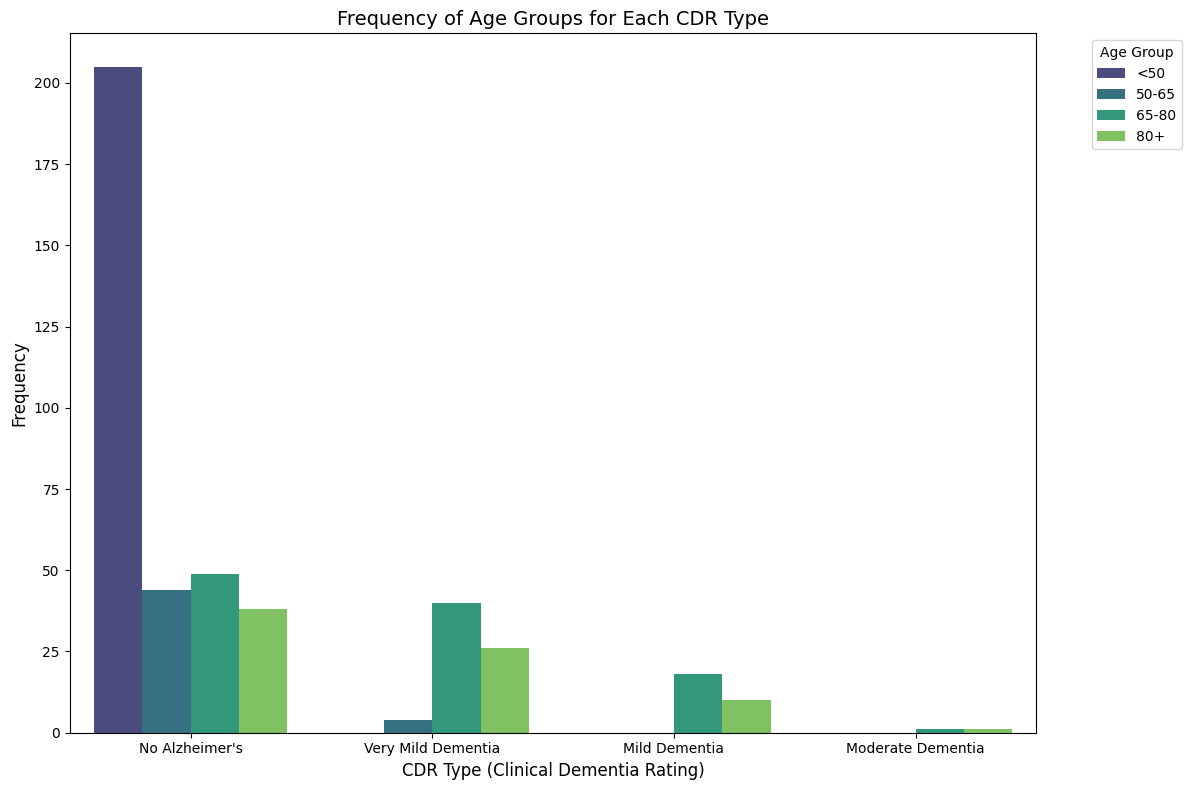

In [115]:
plt.figure(figsize=(12, 8))

# Create a grouped bar chart
sns.countplot(data=df, x='CDR_Labels', hue='Age_Group', palette='viridis')

# Add titles and labels
plt.title('Frequency of Age Groups for Each CDR Type', fontsize=14)
plt.xlabel('CDR Type (Clinical Dementia Rating)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [44]:
"""
Data Visualization of the OASIS-1 dataset.

Each subject in the dataset originally had raw structural MRI scans stored as 3D NiFTI volumes.
To ensure compatibility with Vision-Language Models (VLMs), these volumes were converted into 2D images.
The images were extracted by slicing along the z-axis, which corresponds to the axial plane.

For consistency and relevance, slices ranging from index 100 to 160 were selected, as they typically capture the most informative regions of the brain structure.

We have also chosen to use MPR1 MRI's for T1-weighted scans.

Each 2D image derived from an OASIS subject follows the naming convention:
<OAS1_[ID]_mpr1_[sliceno].jpg>
"""

BASE_PATH = './oasis_1'
IMAGE_PATHS = glob.glob(f'{BASE_PATH}/**/*.jpg',recursive=True)

print("Number of raw images:", len(IMAGE_PATHS))

Number of raw images: 86437


In [49]:
MPR1_IMAGE_PATHS = [image_path for image_path in IMAGE_PATHS if '_mpr-1_' in image_path]
print(f"Total mpr1 images: {len(MPR1_IMAGE_PATHS)}")

print("Sample paths:")
for idx in range(5):
    print(MPR1_IMAGE_PATHS[idx])

Total mpr1 images: 22265
Sample paths:
./oasis_1\Mild Dementia\OAS1_0028_MR1_mpr-1_100.jpg
./oasis_1\Mild Dementia\OAS1_0028_MR1_mpr-1_101.jpg
./oasis_1\Mild Dementia\OAS1_0028_MR1_mpr-1_102.jpg
./oasis_1\Mild Dementia\OAS1_0028_MR1_mpr-1_103.jpg
./oasis_1\Mild Dementia\OAS1_0028_MR1_mpr-1_104.jpg


In [57]:
# Visualizing a random ID.
random_id = random.choice([image_path.split('_')[2] for image_path in MPR1_IMAGE_PATHS])
print(f"Selected random ID: {random_id}")

selected_images = [image_path for image_path in MPR1_IMAGE_PATHS if f"_{random_id}_" in image_path]

selected_images

Selected random ID: 0145


['./oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_100.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_101.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_102.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_103.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_104.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_105.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_106.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_107.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_108.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_109.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_110.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_111.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_112.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_113.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_114.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_115.jpg',
 './oasis_1\\Non Demented\\OAS1_0145_MR1_mpr-1_116.jpg',
 './oasis_1\\Non Demented\\OAS1

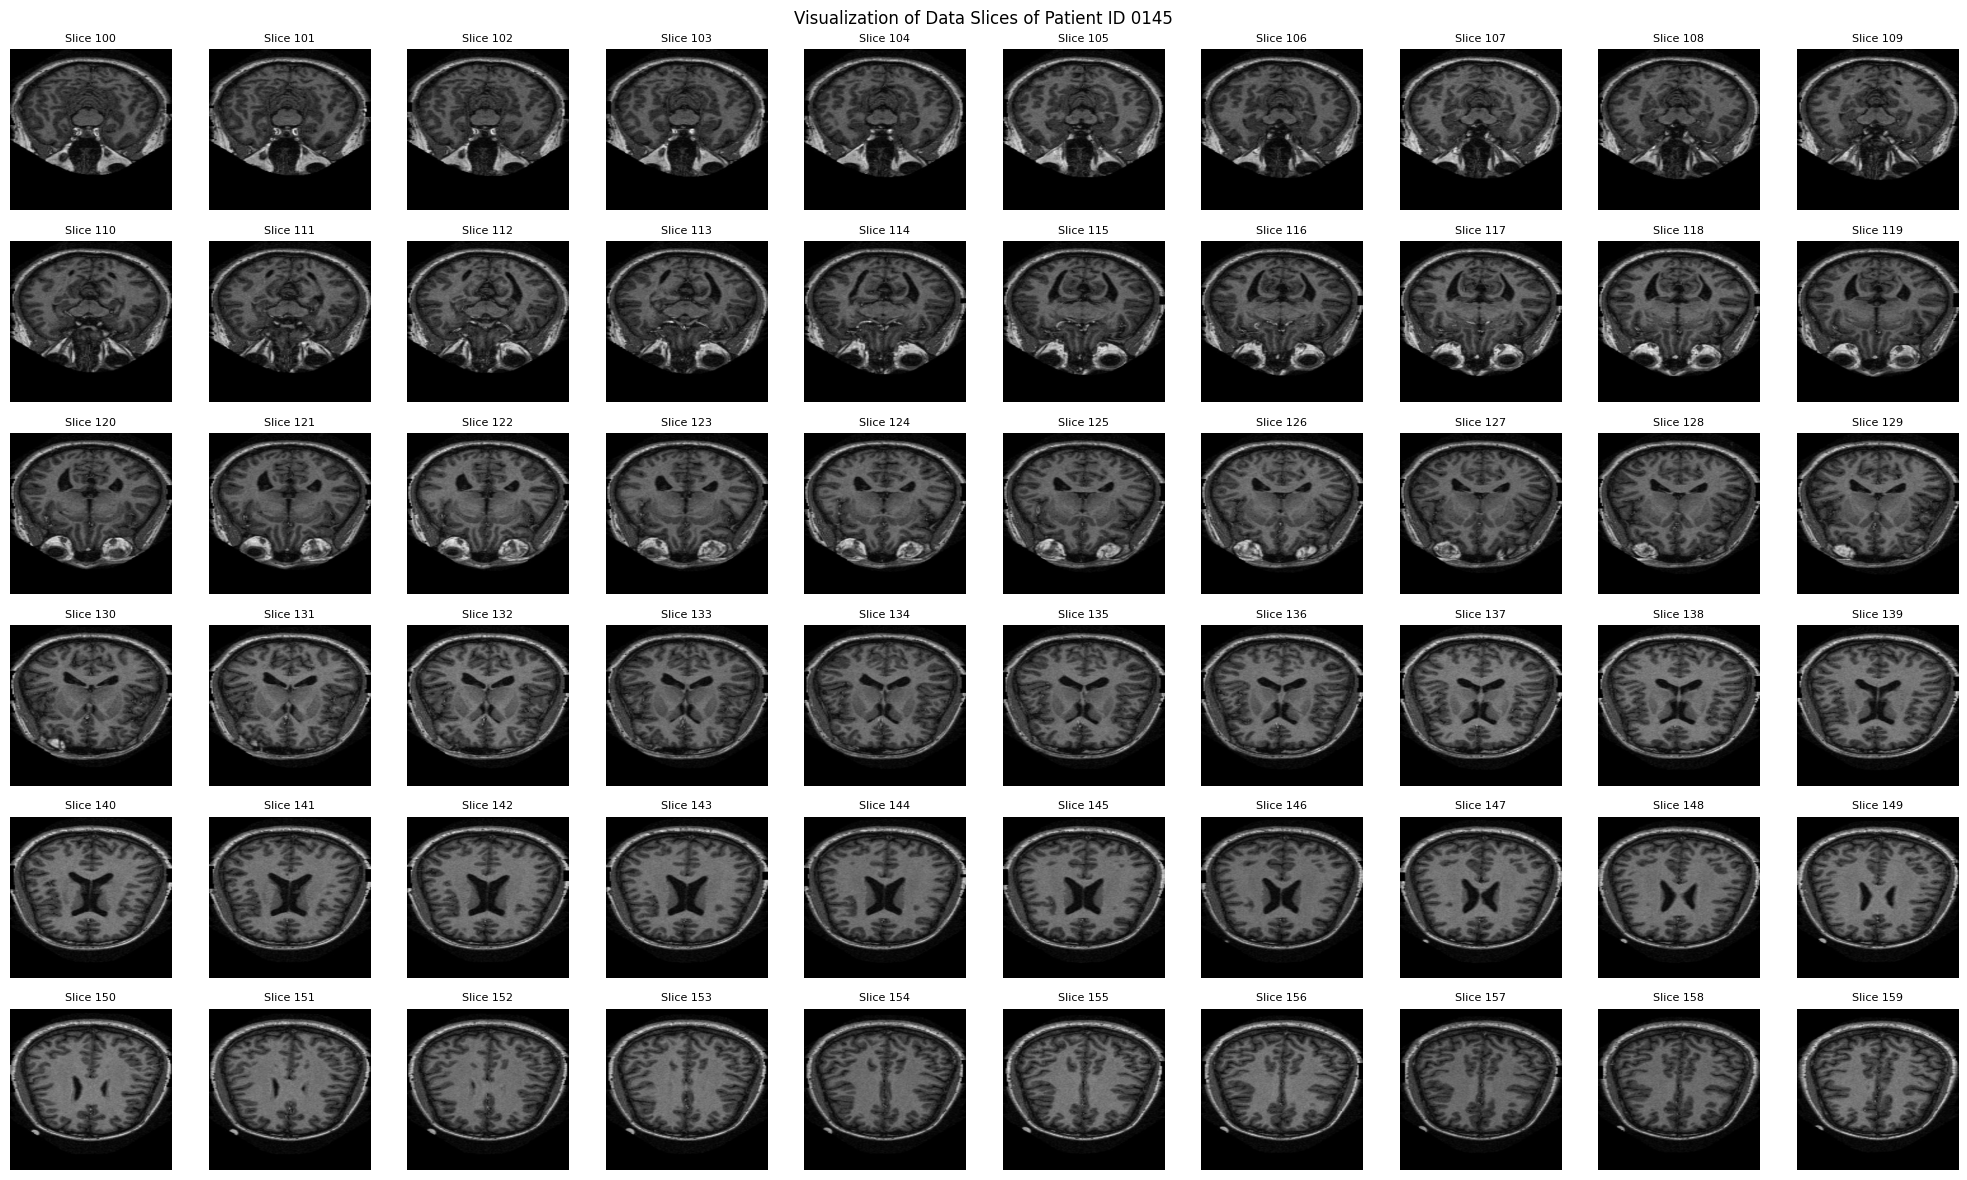

In [111]:
selected_images = selected_images[:60]  

fig, axes = plt.subplots(6, 10, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    if i < len(selected_images):
        img = cv2.imread(selected_images[i])
        img = cv2.resize(img, (256,256))
        
        # Rotate the image by 90 degrees clockwise
        img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        
        ax.imshow(img)
        ax.axis('off')  
        slice_number = selected_images[i].split('_')[-1].split('.')[0]
        ax.set_title(f"Slice {slice_number}", fontsize=8)

plt.suptitle(f'Visualization of Data Slices of Patient ID {random_id}')
plt.tight_layout()  
plt.show()


## Annotation (Generating image captions)

In [ ]:
import pandas as pd
import random

# Define the context for the scores
score_context = {
    'MMSE': "MMSE (Mini-Mental State Examination) is a cognitive assessment used to evaluate cognitive function. A score of 24-30 indicates normal cognitive function, while scores below 24 suggest cognitive impairment.",
    'eTIV': "eTIV (estimated Total Intracranial Volume) measures the volume of the skull, which is related to brain size. The normal range varies based on age and sex, but it's generally around 1400-1600 cm^3.",
    'nWBV': "nWBV (normalized Whole Brain Volume) is the proportion of the brain's volume relative to the total intracranial volume. A higher percentage generally suggests better brain health, with a range from ~70% to 85%.",
    'ASF': "ASF (Atlas Scaling Factor) adjusts the image to match a reference template. Values around 1 indicate good alignment, while values significantly higher or lower may indicate problems with the scaling or registration process.",
    'CDR': "CDR (Clinical Dementia Rating) is used to assess the severity of dementia. A score of 0 indicates no dementia, 0.5 suggests very mild dementia, 1 indicates mild dementia, 2 indicates moderate dementia, and 3 indicates severe dementia."
}

# Function to handle missing or unavailable values
def handle_missing_value(value):
    if pd.isna(value) or value == -1:
        return "Information unavailable."
    return str(value)

# Function to generate the caption for each image
def generate_caption(row):
    caption = (
        f"Patient ID: {row['ID']},\n"
        f"Gender: {row['M/F']}, Handedness: {row['Hand']}, Age: {row['Age']} years,\n"
        f"Education: {handle_missing_value(row['Educ'], 'Education')},\n"
        f"Socioeconomic Status: {handle_missing_value(row['SES'], 'Socioeconomic Status')},\n"
        f"MMSE: {handle_missing_value(row['MMSE'], 'MMSE')} ({score_context.get('MMSE', '')}),\n"
        f"CDR: {handle_missing_value(row['CDR'], 'CDR')} ({score_context.get('CDR', '')}),\n"
        f"eTIV: {handle_missing_value(row['eTIV'], 'eTIV')} ({score_context.get('eTIV', '')}),\n"
        f"nWBV: {handle_missing_value(row['nWBV'], 'nWBV')} ({score_context.get('nWBV', '')}),\n"
        f"ASF: {handle_missing_value(row['ASF'], 'ASF')} ({score_context.get('ASF', '')})."
    )
    return caption

# Generate captions for each image in the selected images list
captions = []
for image_path in selected_images:
    patient_id = image_path.split('\\')[-1].split('_')[0] + '_' + image_path.split('\\')[-1].split('_')[1]+"_MR1"    
    patient_data = df[df['ID'] == patient_id]
    
    if patient_data.empty:
        print(f"Warning: No data found for patient ID {patient_id}. Skipping image {image_path}.")
        continue
    
    # Get the first match for the patient ID (assuming unique IDs)
    patient_data = patient_data.iloc[0]  
    
    # Generate the caption
    caption = generate_caption(patient_data)
    captions.append(caption)

# Example: Display a caption for a random image
random_idx = random.choice(range(len(captions)))
print(f"Caption for image {selected_images[random_idx]}:\n{captions[random_idx]}")


Caption for image ./oasis_1\Non Demented\OAS1_0145_MR1_mpr-1_153.jpg:
Patient ID: OAS1_0145_MR1,
Gender: M, Handedness: R, Age: 34 years,
Education: Information unavailable.,
Socioeconomic Status: Information unavailable.,
MMSE: Information unavailable. (MMSE (Mini-Mental State Examination) is a cognitive assessment used to evaluate cognitive function. A score of 24-30 indicates normal cognitive function, while scores below 24 suggest cognitive impairment.),
CDR: 0.0 (CDR (Clinical Dementia Rating) is used to assess the severity of dementia. A score of 0 indicates no dementia, 0.5 suggests very mild dementia, 1 indicates mild dementia, 2 indicates moderate dementia, and 3 indicates severe dementia.),
eTIV: 1653 (eTIV (estimated Total Intracranial Volume) measures the volume of the skull, which is related to brain size. The normal range varies based on age and sex, but it's generally around 1400-1600 cm^3.),
nWBV: 0.831 (nWBV (normalized Whole Brain Volume) is the proportion of the brai

## Train Test Split


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

# Define the function to handle missing or unavailable values (from previous code)
def handle_missing_value(value, column_name):
    if pd.isna(value) or value == -1:
        return "Information unavailable."
    return str(value)

# Define the function to generate the caption (from previous code)
def generate_caption(row):
    caption = (
        f"Patient ID: {row['ID']},\n"
        f"Gender: {row['M/F']}, Handedness: {row['Hand']}, Age: {row['Age']} years,\n"
        f"Education: {handle_missing_value(row['Educ'], 'Education')},\n"
        f"Socioeconomic Status: {handle_missing_value(row['SES'], 'Socioeconomic Status')},\n"
        f"MMSE: {handle_missing_value(row['MMSE'], 'MMSE')} ({score_context.get('MMSE', '')}),\n"
        f"CDR: {handle_missing_value(row['CDR'], 'CDR')} ({score_context.get('CDR', '')}),\n"
        f"eTIV: {handle_missing_value(row['eTIV'], 'eTIV')} ({score_context.get('eTIV', '')}),\n"
        f"nWBV: {handle_missing_value(row['nWBV'], 'nWBV')} ({score_context.get('nWBV', '')}),\n"
        f"ASF: {handle_missing_value(row['ASF'], 'ASF')} ({score_context.get('ASF', '')})."
    )
    return caption

# Split data into train and test sets based on the unique patient IDs
train_patient_ids, test_patient_ids = train_test_split(df['ID'].unique(), test_size=0.2, random_state=42)

# Create a function to generate captions for train or test sets
def generate_captions_for_subset(patient_ids):
    captions = []
    for patient_id in patient_ids:
        patient_data = df[df['ID'] == patient_id]
        
        if patient_data.empty:
            print(f"Warning: No data found for patient ID {patient_id}. Skipping.")
            continue

        patient_data = patient_data.iloc[0]        
        caption = generate_caption(patient_data)
        captions.append(caption)
    
    return captions

# Generate captions for the train and test sets
train_captions = generate_captions_for_subset(train_patient_ids)
test_captions = generate_captions_for_subset(test_patient_ids)

# Example: Display a caption for a random image from the test set
random_idx = random.choice(range(len(test_captions)))
print(f"Caption for image in test set:\n{test_captions[random_idx]}")


Caption for image in test set:
Patient ID: OAS1_0033_MR1,
Gender: F, Handedness: R, Age: 80 years,
Education: 4.0,
Socioeconomic Status: 2.0,
MMSE: 29.0 (MMSE (Mini-Mental State Examination) is a cognitive assessment used to evaluate cognitive function. A score of 24-30 indicates normal cognitive function, while scores below 24 suggest cognitive impairment.),
CDR: 0.0 (CDR (Clinical Dementia Rating) is used to assess the severity of dementia. A score of 0 indicates no dementia, 0.5 suggests very mild dementia, 1 indicates mild dementia, 2 indicates moderate dementia, and 3 indicates severe dementia.),
eTIV: 1323 (eTIV (estimated Total Intracranial Volume) measures the volume of the skull, which is related to brain size. The normal range varies based on age and sex, but it's generally around 1400-1600 cm^3.),
nWBV: 0.735 (nWBV (normalized Whole Brain Volume) is the proportion of the brain's volume relative to the total intracranial volume. A higher percentage generally suggests better b

# Project Strategy Plan 

## Objective:
The goal of this project is to develop a Vision-Language Model (VLM) specialized in medical imaging data to detect Alzheimer's presence, its stage, and related characteristics. The dataset consists of brain MRI images, with each patient having 60 slices, alongside metadata (e.g., age, gender, MMSE scores, etc.) to provide context.

## Dataset Overview:
- **Images:** The dataset contains MRI images with 60 slices per patient ID.
- **Metadata:** Each patient has a series of columns like MMSE, eTIV, nWBV, ASF, and others that describe clinical attributes. Some of these columns may have missing or unavailable information.
- **Text Captions:** For each image, we will generate captions based on the metadata to provide meaningful descriptions for the model. The captions will include information such as the patient's ID, gender, age, education, and clinical measures (e.g., MMSE score, CDR, eTIV, nWBV, ASF).

## Approach:
- **Image-Text Pairs:** Each image will be paired with a caption describing the patient's clinical details. The caption will provide context that helps the model understand the relationship between the brain MRI image and the associated clinical information.
- **VLM Training:** We will use these image-text pairs to train a Vision-Language Model (VLM) that can understand the relationship between the image and the accompanying textual information. The VLM will be fine-tuned to recognize patterns that can predict the presence and stage of Alzheimer's disease.

## Training-Testing Strategy:
- **Train-Test Split:** A train-test split will be applied to ensure robust evaluation of the model. The train dataset will be used to train the model, while the test dataset will be reserved for evaluating its performance.
- **Evaluation Metrics:** The model will be evaluated based on its ability to detect Alzheimer's presence and stage, using metrics such as accuracy, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).

## Alternative Approach:
An alternative approach under consideration is to generate a separate caption for each slice within a patient's dataset, rather than using a single caption for the entire set of images for a patient. This approach would involve creating a caption for each of the 60 slices per patient, offering more granular information (i.e. slice number) about each MRI image. 

## Decision to be Made:
A final decision on whether to use a single caption per patient or generate captions for each slice will be made in a subsequent meeting with the instructor. This will depend on the performance of initial tests and the ability of the model to generalize across multiple slices for a given patient.
